# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

# AUTHOR - ARPITA SAHOO

## Intermediate Level Task

### TASK-6- Prediction using Decision Tree  Algorithm : 
Creating the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Correlation Matrix

In [8]:
df_numeric = df.select_dtypes(include=np.number)
corr = df_numeric.corr()

<Axes: >

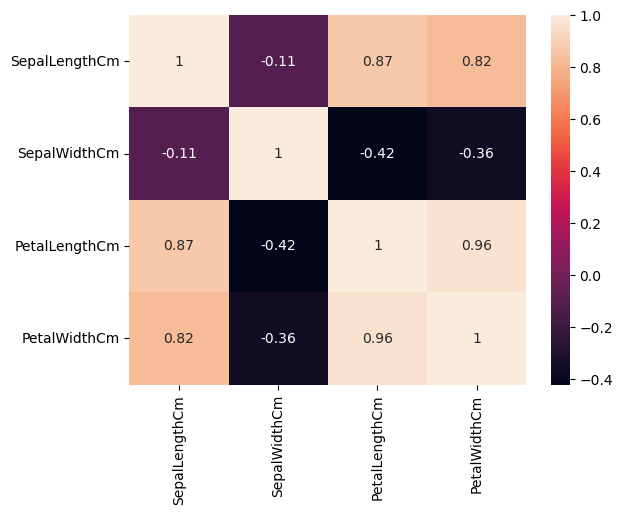

In [9]:
sns.heatmap(corr,annot=True)

# Label Encoding

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
species=df.iloc[:,-1]
le.fit(species)
df.iloc[:,-1]=le.transform(species)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Training_Testing Dataset

In [11]:
x=df.iloc[:,0:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model- Decision Tree Classifier

In [14]:
print(np.unique(y_train))


[0 1 2]


In [15]:
print(x_train.isnull().sum())
print(x_train.dtypes)


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


In [16]:
print(y_train.isnull().sum())
print(y_train.isna().sum())


0
0


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [18]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_predict=DT.predict(x_test)
y_predict

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 0, 1, 2, 1, 2])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9


In [20]:
confusion_matrix(y_predict,y_test)

array([[ 6,  0,  0],
       [ 0, 12,  1],
       [ 0,  2,  9]], dtype=int64)

In [21]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       0.86      0.92      0.89        13\n           2       0.90      0.82      0.86        11\n\n    accuracy                           0.90        30\n   macro avg       0.92      0.91      0.92        30\nweighted avg       0.90      0.90      0.90        30\n'

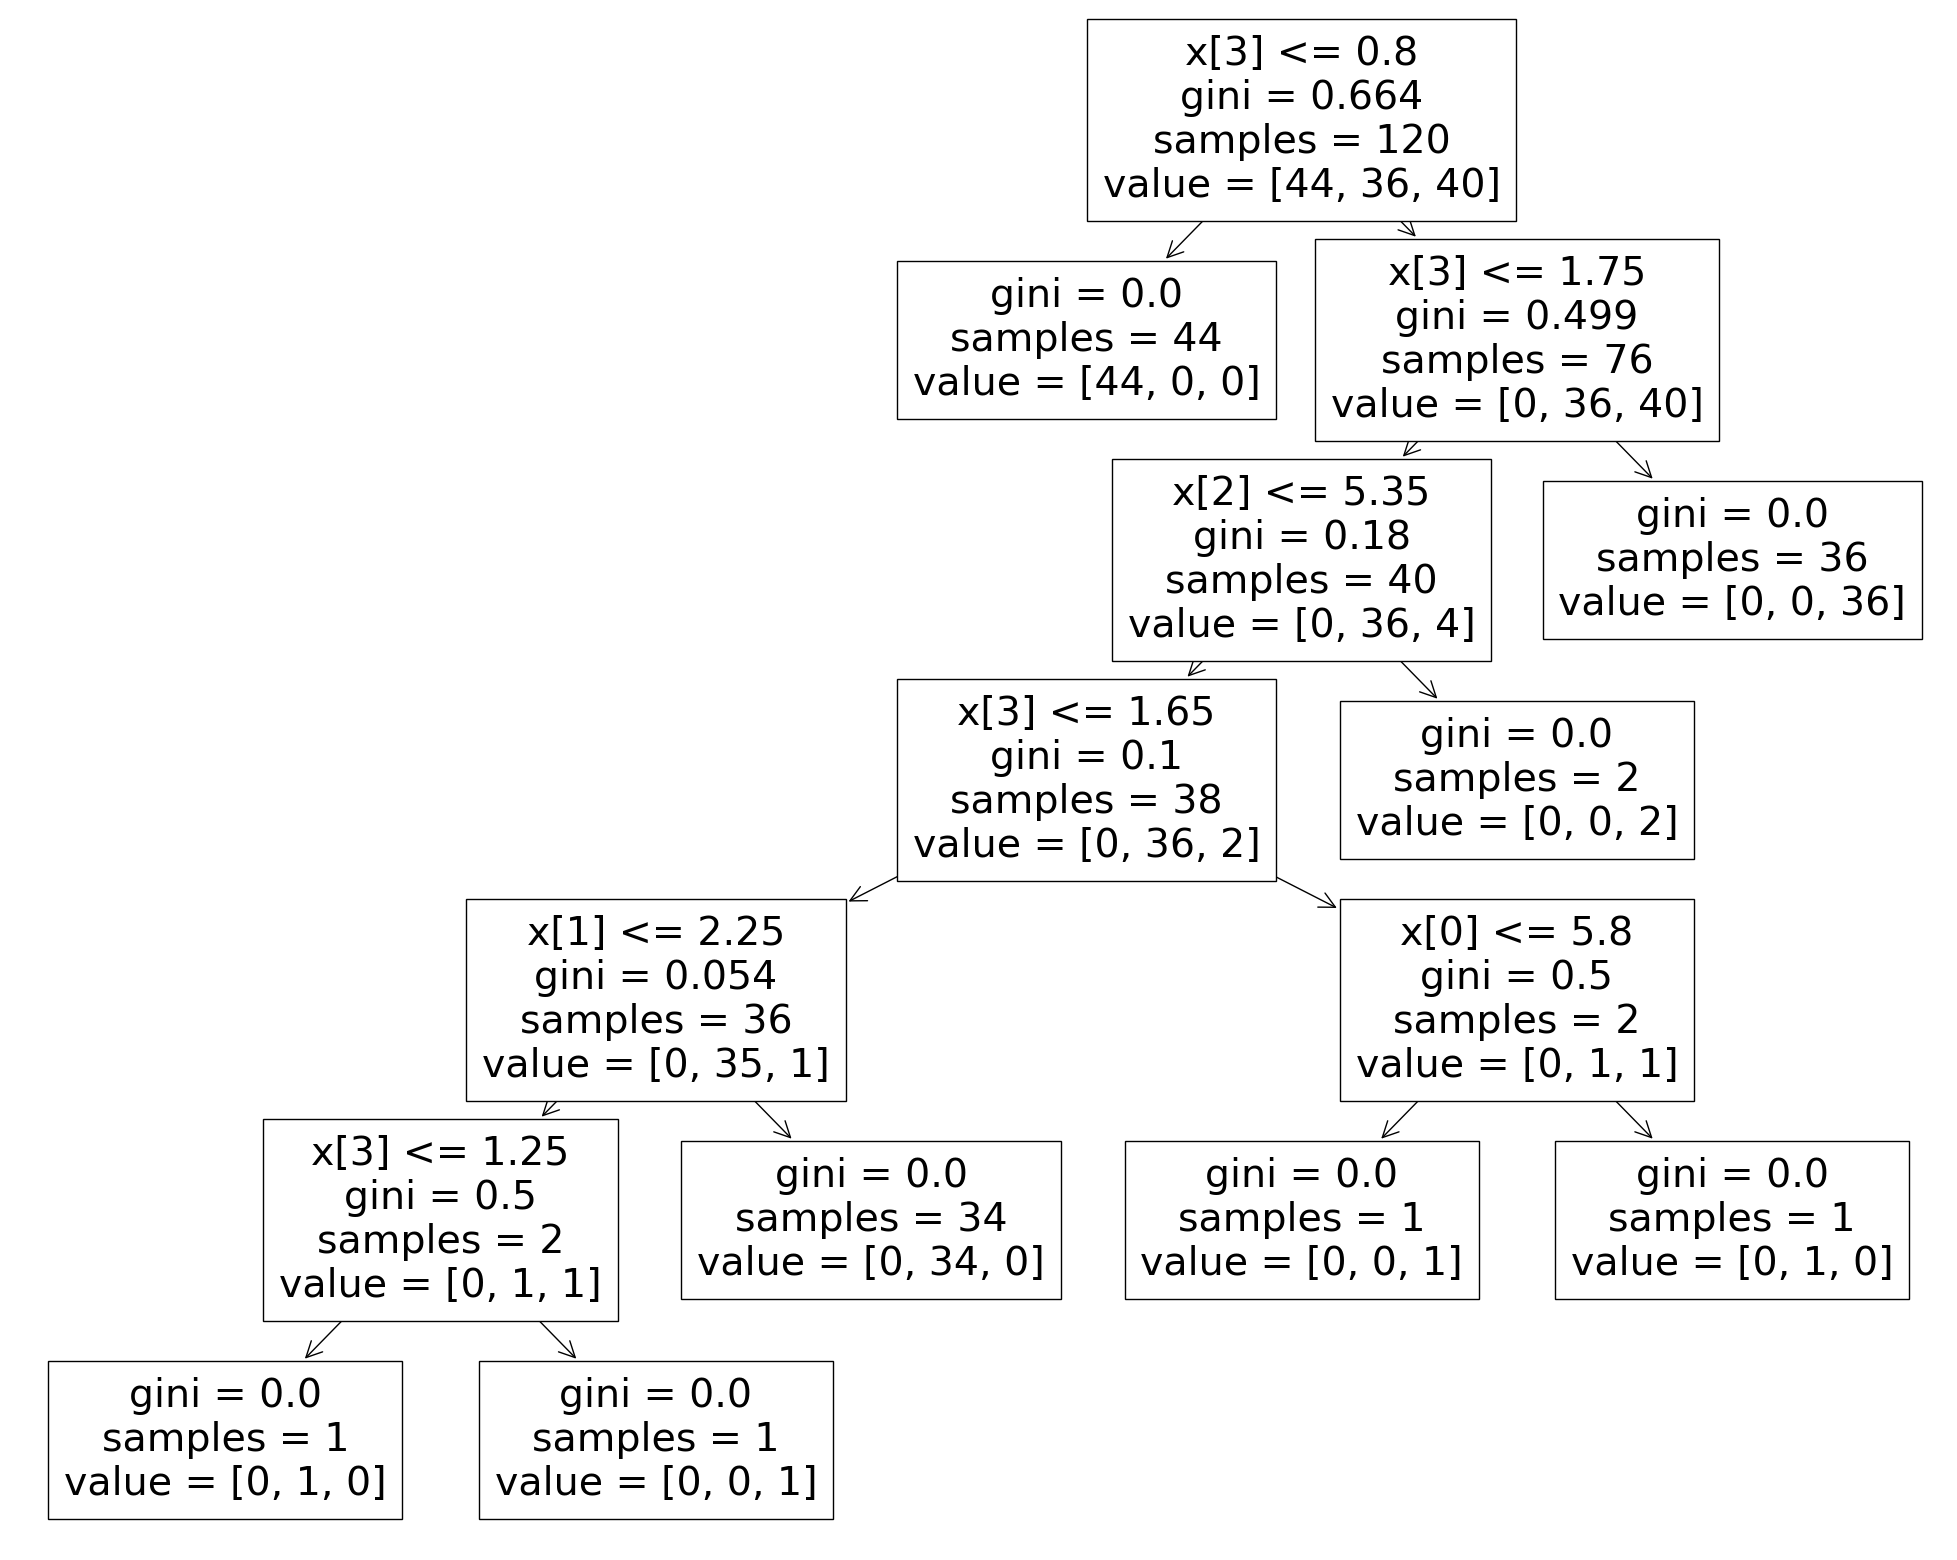

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT)

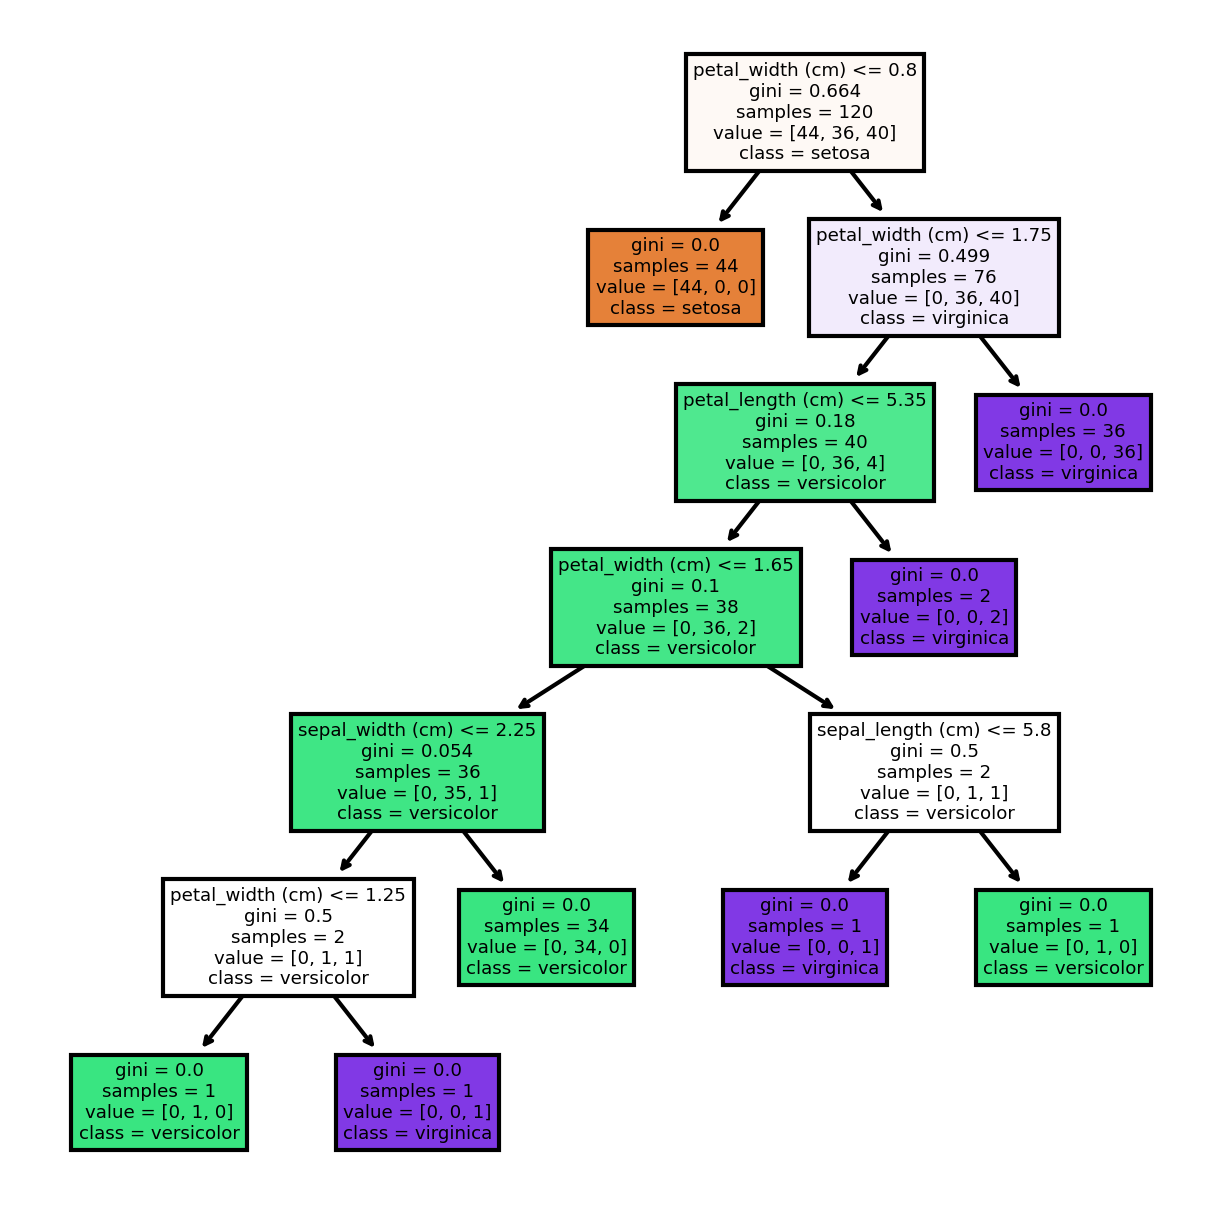

In [23]:
fn=['sepal_length (cm)','sepal_width (cm)','petal_length (cm)','petal_width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(DT,
               feature_names = fn, 
               class_names=cn,
               filled = True);